# 🏡 House Price Prediction  
Predicting real estate prices using machine learning models based on key housing features.


In [148]:
import pandas as pd
import numpy as np

In [149]:
df = pd.read_csv(r"C:\Users\Yuvraj Bhavsar\OneDrive\Desktop\csv file\house_prices.csv")

In [150]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,N,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,N,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,N,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,N,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,N,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [151]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,N,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,N,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,N,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,N,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,N,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [152]:
df.shape

(21613, 21)

In [153]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# **Data Cleaning and Analysis**

## Unnecessary Columns for House Price Prediction

- **id** → Just an identifier, not useful for price prediction.  
- **date** → Unless you’re considering time-based price trends, it’s not needed.  
- **sqft_lot** → Lot size has less impact compared to living space.  
- **sqft_lot15** → Similar to `sqft_lot`, not as influential as `sqft_living`.  

## 🏡 Important Features for House Price Prediction

- **sqft_living** → More living space usually means a higher price.  
- **bedrooms** → More bedrooms often increase the price.  
- **bathrooms** → More bathrooms are a sign of a premium house.  
- **floors** → The number of floors can indicate the house size.  
- **waterfront** → Houses near water are usually more expensive.  
- **view** → A better view can increase house value.  
- **condition** → The overall condition of the house affects the price.  
- **grade** → Indicates house quality, directly affecting price.  
- **sqft_above** → Above-ground square footage matters.  
- **sqft_basement** → Finished basements add value.  
- **yr_built** → Older houses may require renovations, affecting value.  
- **yr_renovated** → Renovated houses tend to be priced higher.  
- **zipcode** → Location impacts price significantly.  
- **lat, long** → Exact location helps in spatial analysis.  
- **sqft_living15** → Nearby house sizes can indicate neighborhood trends.  

### Drop Unnecessary Columns

In [154]:
columns = ['id', 'date', 'sqft_lot', 'sqft_lot15']

In [155]:
df = df.drop(columns=columns, axis=1)

In [156]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
0,221900.0,3,1.00,1180,1.0,N,0,Average,7,1180,0,1955,0,98178,47.5112,-122.257,1340
1,538000.0,3,2.25,2570,2.0,N,0,Average,7,2170,400,1951,1991,98125,47.7210,-122.319,1690
2,180000.0,2,1.00,770,1.0,N,0,Average,6,770,0,1933,0,98028,47.7379,-122.233,2720
3,604000.0,4,3.00,1960,1.0,N,0,Very Good,7,1050,910,1965,0,98136,47.5208,-122.393,1360
4,510000.0,3,2.00,1680,1.0,N,0,Average,8,1680,0,1987,0,98074,47.6168,-122.045,1800


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  object 
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  object 
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
dtypes: float64(5), int64(10), object(2)
memory usage: 

In [158]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
dtype: int64

In [159]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,floors,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.494309,0.234303,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492
std,3.671272e+05,0.930062,0.770163,918.440897,0.539989,0.766318,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,0.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,4.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000


In [160]:
df['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [161]:
df['bathrooms'].value_counts()

bathrooms
2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.50       2
6.25       2
7.75       1
7.50       1
Name: count, dtype: int64

In [162]:
df['floors'].value_counts()

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

In [163]:
df['view'].value_counts()

view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64

In [164]:
df['waterfront'].value_counts()

waterfront
N    21450
Y      163
Name: count, dtype: int64

In [165]:
df['waterfront'] = df['waterfront'].replace({'N': 0, 'Y': 1}).astype(int)

C:\Users\Yuvraj Bhavsar\AppData\Local\Temp\ipykernel_37944\3454787754.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['waterfront'] = df['waterfront'].replace({'N': 0, 'Y': 1}).astype(int)


In [166]:
df['condition'].value_counts()

condition
Average      14031
Good          5679
Very Good     1701
Fair           172
Poor            30
Name: count, dtype: int64

In [167]:
condition_mapping = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
df['condition'] = df['condition'].map(condition_mapping)

In [168]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340
1,538000.0,3,2.25,2570,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690
2,180000.0,2,1.00,770,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720
3,604000.0,4,3.00,1960,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360
4,510000.0,3,2.00,1680,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800


# **Visualization**

**Dark purple = Lower price**

**Bright yellow = Higher price**

C:\Users\Yuvraj Bhavsar\AppData\Local\Programs\Python\Python312\Lib\site-packages\contextily\tile.py:645: UserWarning: The inferred zoom level of 26 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


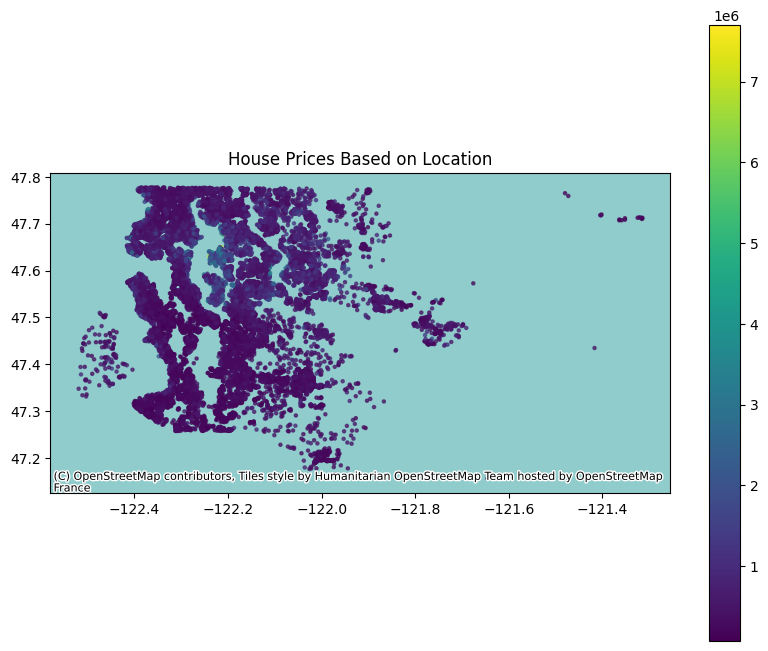

In [169]:
import geopandas as gpd
import contextily as ctx  
import matplotlib.pyplot as plt

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['long'], df['lat']))

fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(column='price', cmap='viridis', markersize=5, alpha=0.7, legend=True, ax=ax)
ctx.add_basemap(ax, crs=gdf.crs)  # Add a real-world map
plt.title('House Prices Based on Location')
plt.show()

## Heatmap

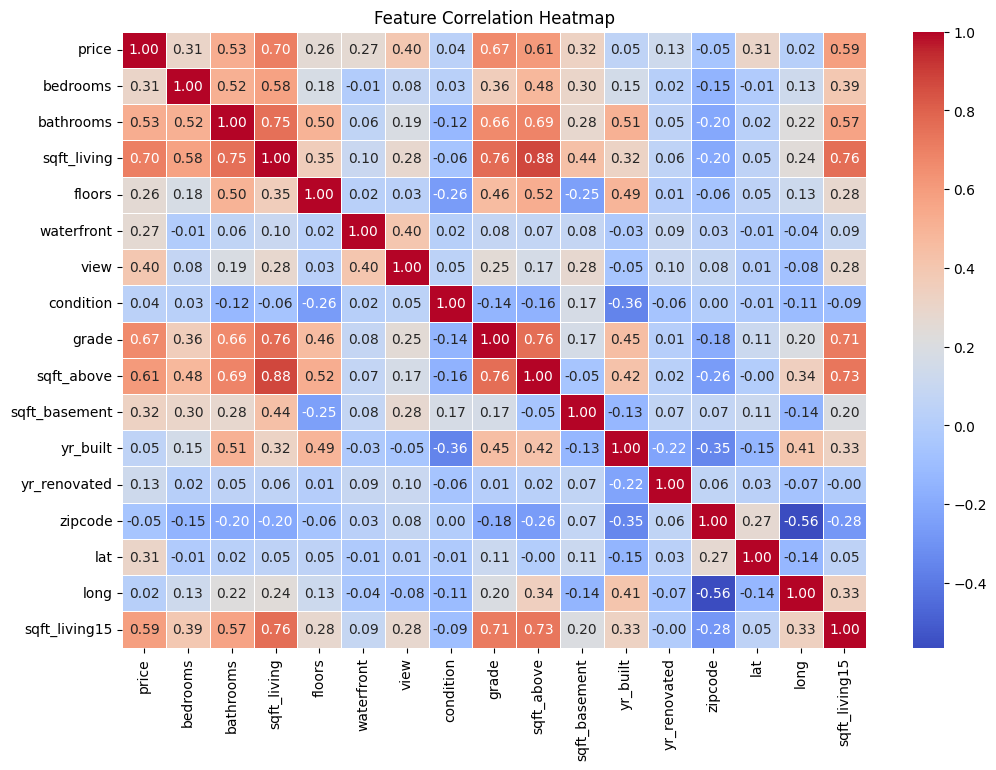

In [170]:
import seaborn as sns
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

## Scatter Plot

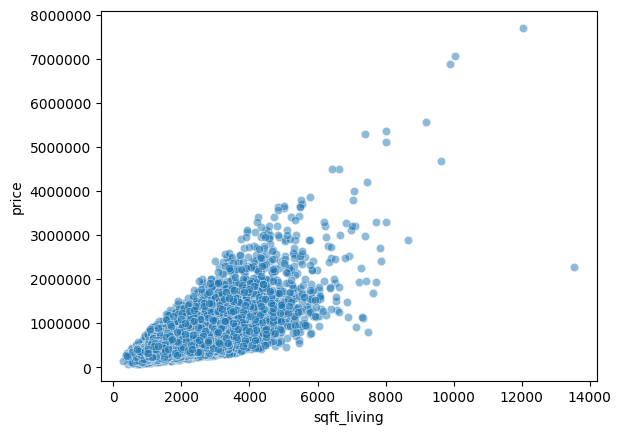

In [171]:
sns.scatterplot(x=df['sqft_living'], y=df['price'], alpha=0.5) 
plt.ticklabel_format(style='plain', axis='y')

## Radial Bar Plot

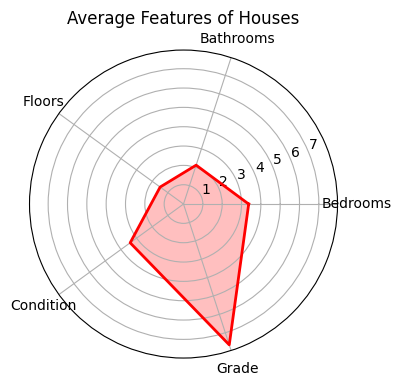

In [172]:
import numpy as np

labels = ['Bedrooms', 'Bathrooms', 'Floors', 'Condition', 'Grade']
values = df[['bedrooms', 'bathrooms', 'floors', 'condition', 'grade']].mean().tolist()

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
values += values[:1]  # Repeat first value to close the plot
angles += angles[:1]

fig, ax = plt.subplots(figsize=(4,4), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='red', alpha=0.25)
ax.plot(angles, values, color='red', linewidth=2)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Average Features of Houses')
plt.show()


## Count Plot

C:\Users\Yuvraj Bhavsar\AppData\Local\Temp\ipykernel_37944\2107119298.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['floors'], palette='coolwarm')


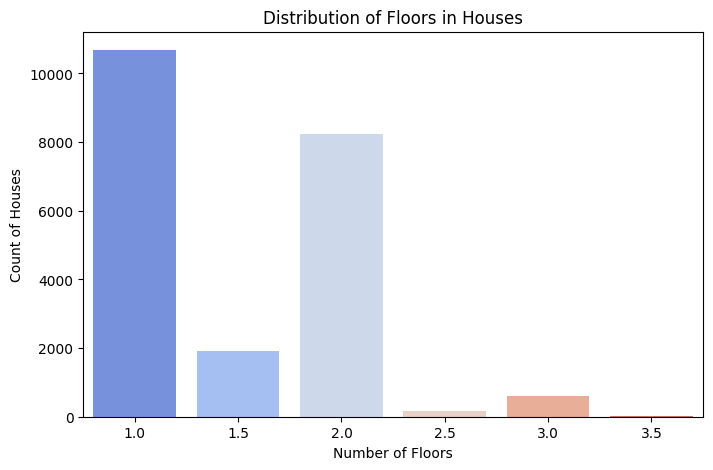

In [173]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['floors'], palette='coolwarm')
plt.xlabel('Number of Floors')
plt.ylabel('Count of Houses')
plt.title('Distribution of Floors in Houses')
plt.show()

## Train_test_split

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
x=df.drop(columns=['price'])
y=df['price']

In [176]:
y = np.log1p(y) 

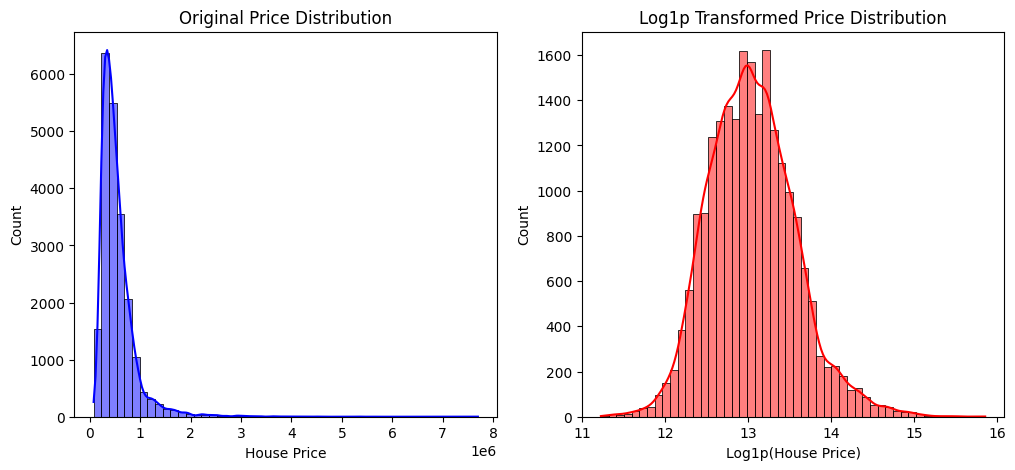

In [177]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=50, kde=True, color='blue')
plt.title('Original Price Distribution')
plt.xlabel('House Price')

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), bins=50, kde=True, color='red')
plt.title('Log1p Transformed Price Distribution')
plt.xlabel('Log1p(House Price)')

plt.show()

In [178]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [179]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17290, 16)
(4323, 16)
(17290,)
(4323,)


## Scaling

In [180]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Feature Importances

In [185]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [186]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Calculate RMSE and R² score
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"R² Score: {r2:}")
    print(f"RMSE Score: {rmse:}")
    return 

In [187]:
linear = LinearRegression()
print("🔹 Linear Regression Results:")
evaluate_model(linear, x_train, x_test, y_train, y_test)

🔹 Linear Regression Results:
R² Score: 0.7715672740559307
RMSE Score: 0.24722565784694955


In [188]:
dt = DecisionTreeRegressor(random_state=42)
print("\n🔹 Decision Tree Regression Results:")
evaluate_model(dt, x_train, x_test, y_train, y_test)


🔹 Decision Tree Regression Results:
R² Score: 0.7757343909803778
RMSE Score: 0.24496030831958296


In [189]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
print("\n🔹 Random Forest Regression Results:")
evaluate_model(rf, x_train, x_test, y_train, y_test)


🔹 Random Forest Regression Results:
R² Score: 0.8844687756755485
RMSE Score: 0.17581829650755107


In [190]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
print("\n🔹 XGBoost Regression Results:")
evaluate_model(xgb, x_train, x_test, y_train, y_test)


🔹 XGBoost Regression Results:
R² Score: 0.8906402144898005
RMSE Score: 0.17105792710383527


In [194]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(objective='regression', random_state=42)
print("\n🔹 LightGBM Regression Results:")
evaluate_model(lgbm, x_train, x_test, y_train, y_test)


🔹 LightGBM Regression Results:
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002583 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1830
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 16
[LightGBM] [Info] Start training from score 13.051415
R² Score: 0.8951854961734843
RMSE Score: 0.16746539240074176
